<a href="https://colab.research.google.com/github/aaronmed/sns/blob/master/UT3%20-%20Algoritmos%20y%20herramientas%20para%20el%20aprendizaje%20supervisado%20/Actividad%203.5%20%E2%80%93%20Clasificaci%C3%B3n%20de%20vinos/SNS_3_5_Clasificacion_de_vinos_blancos_AaronMedinaMelian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aarón Medina Melián

#Importación de las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.utils.multiclass import unique_labels

import joblib

#Importamos el dataset desde Github y limpiamos los valores nulos

In [2]:
winequality_red_url = 'https://raw.githubusercontent.com/aaronmed/sns/master/repositories/winequality-white.csv'
data = pd.read_csv(winequality_red_url, sep=";")

data.dropna(inplace=True)

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#Histogramas para cada característica

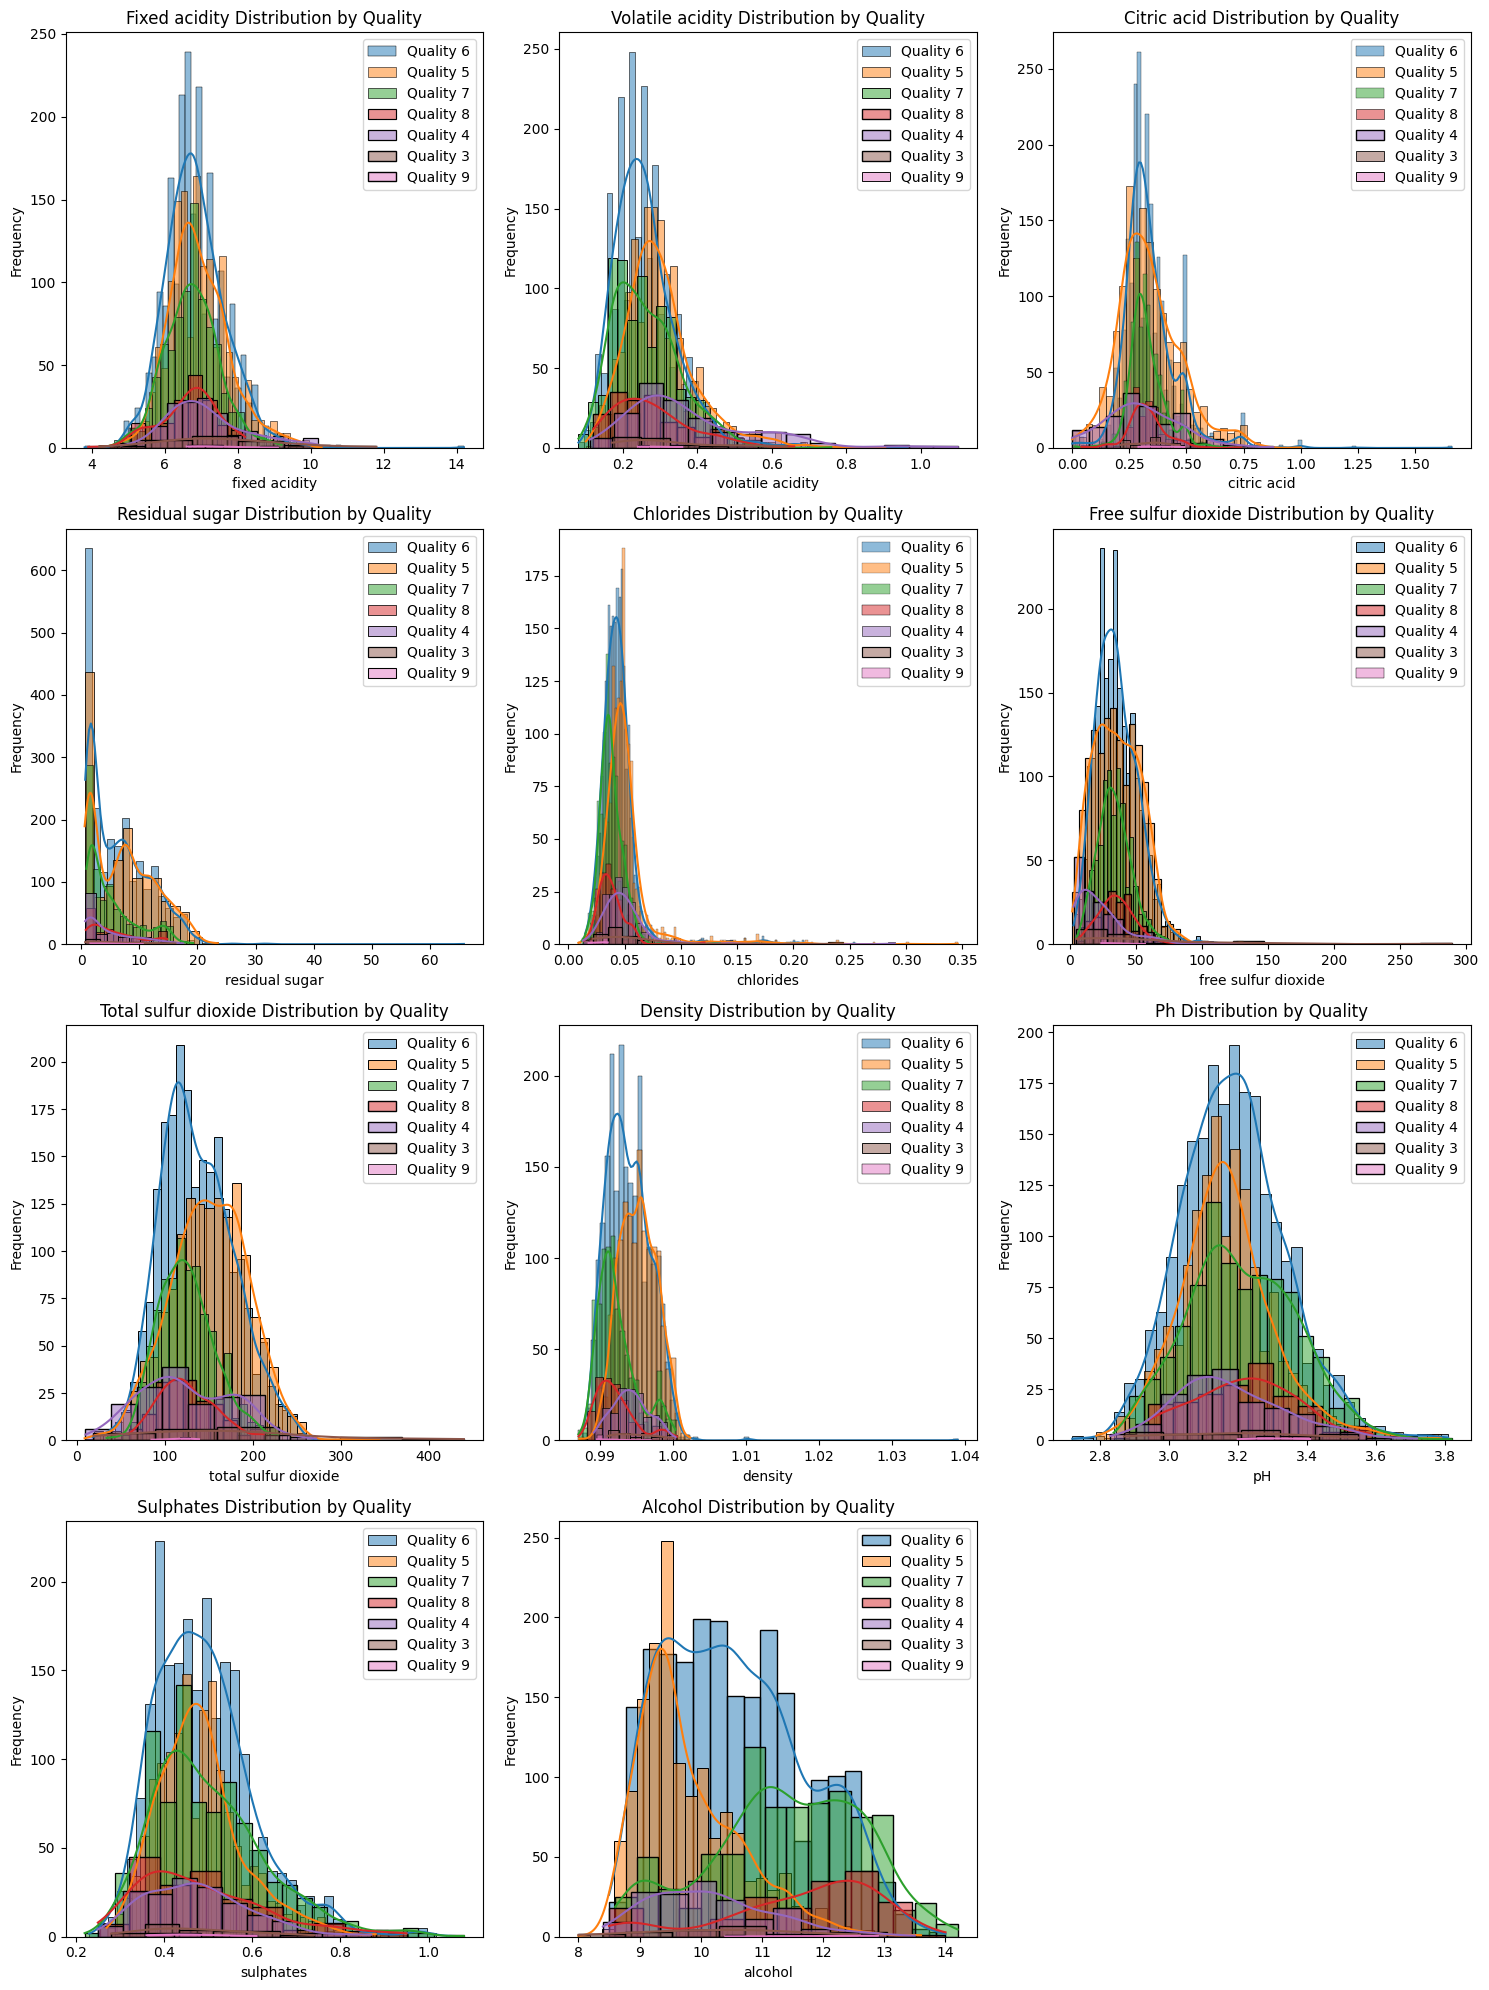

In [3]:
# Definir el número de columnas por fila
num_cols = 3
# Calcular el número total de subplots necesarios
total_subplots = len(data.columns[:-1])
# Calcular el número de filas necesarias
num_rows = (total_subplots - 1) // num_cols + 1

plt.figure(figsize=(15, 5*num_rows))

for i, column in enumerate(data.columns[:-1], 1):  # Excluyendo la columna 'quality'
    plt.subplot(num_rows, num_cols, i)
    for quality in data['quality'].unique():
        sns.histplot(data[data['quality'] == quality][column], label=f'Quality {quality}', kde=True)
    plt.title(f'{column.capitalize()} Distribution by Quality')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

#Boxplot para cada característica

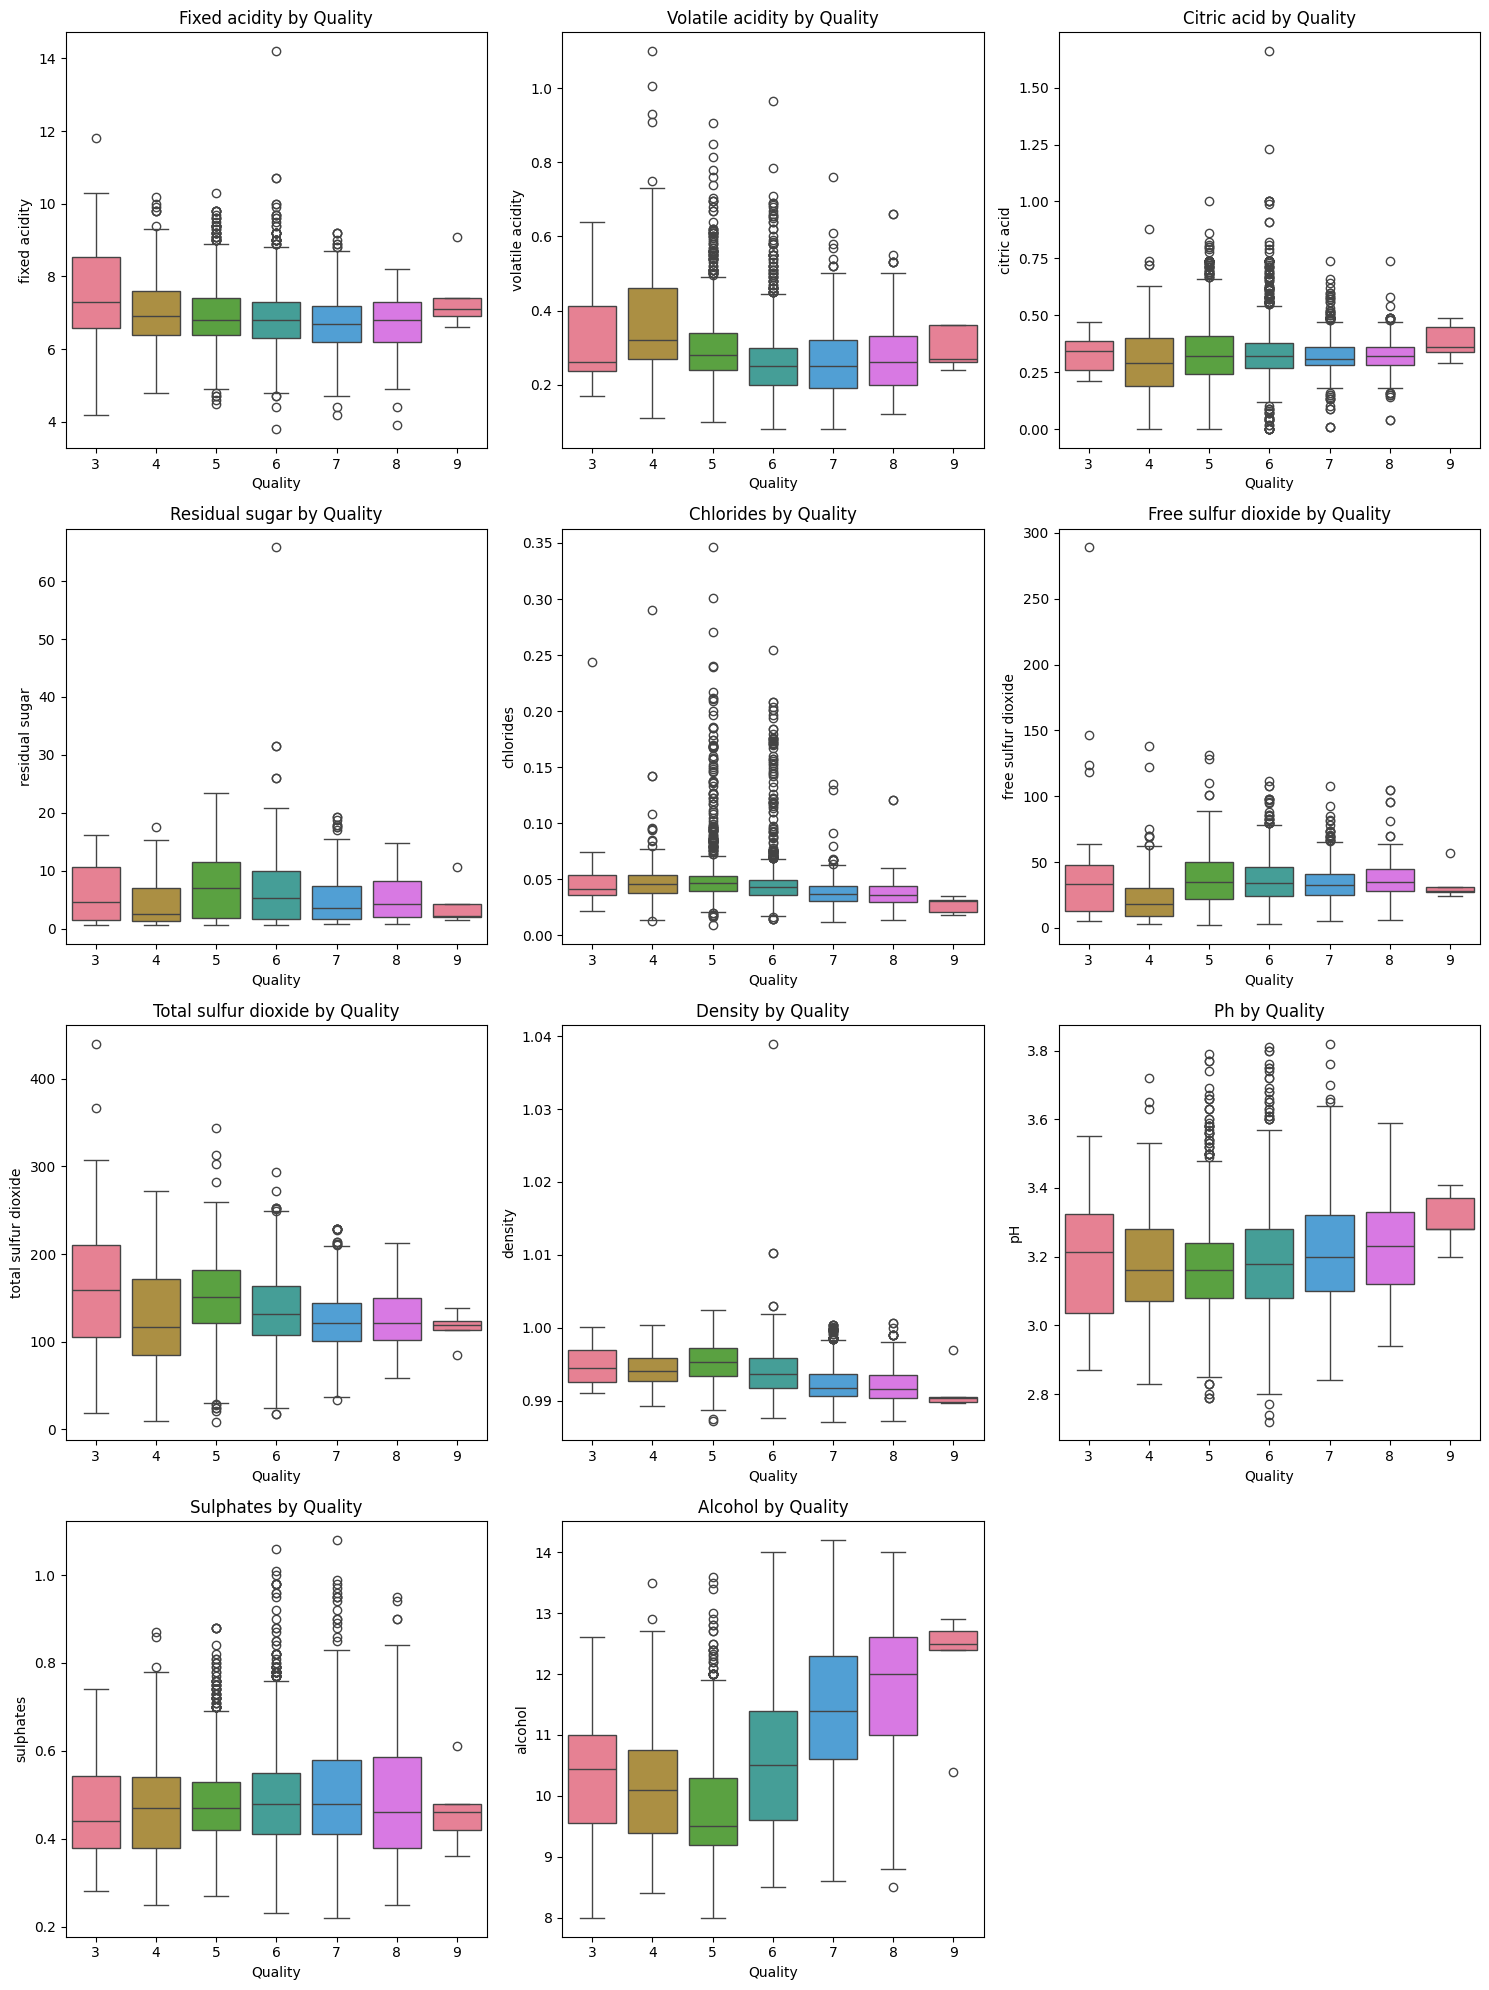

In [4]:
# Definir el número de columnas por fila
num_cols = 3
# Calcular el número total de subplots necesarios
total_subplots = len(data.columns[:-1])
# Calcular el número de filas necesarias
num_rows = (total_subplots - 1) // num_cols + 1

plt.figure(figsize=(15, 5*num_rows))

for i, column in enumerate(data.columns[:-1], 1):  # Excluyendo la columna 'quality'
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='quality', y=column, hue='quality', data=data, palette="husl", legend=False)
    plt.title(f'{column.capitalize()} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#Matriz de correlación de variables

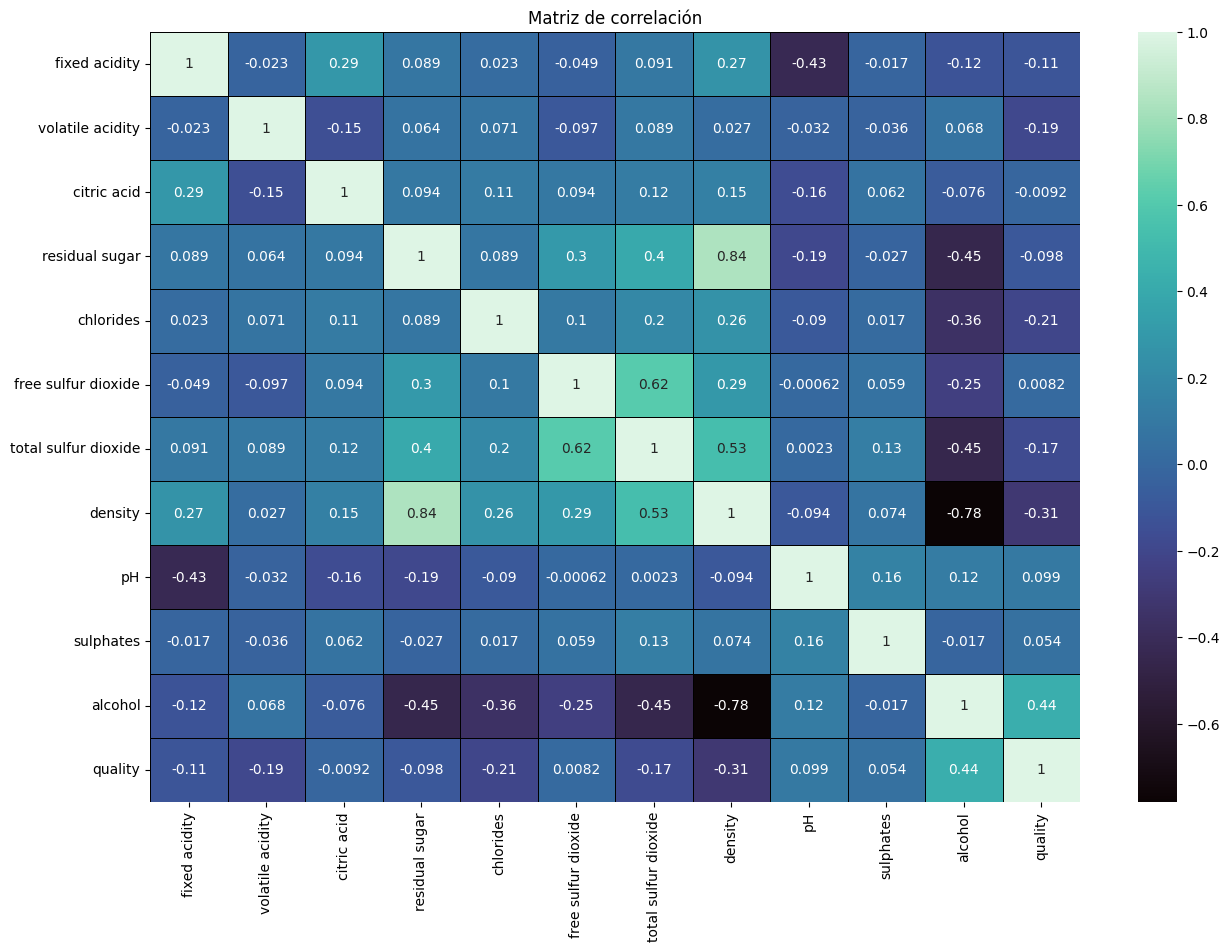

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='mako', linewidths=0.5, linecolor='black')

plt.title('Matriz de correlación')

plt.show()

#Técnicas de selección de variables

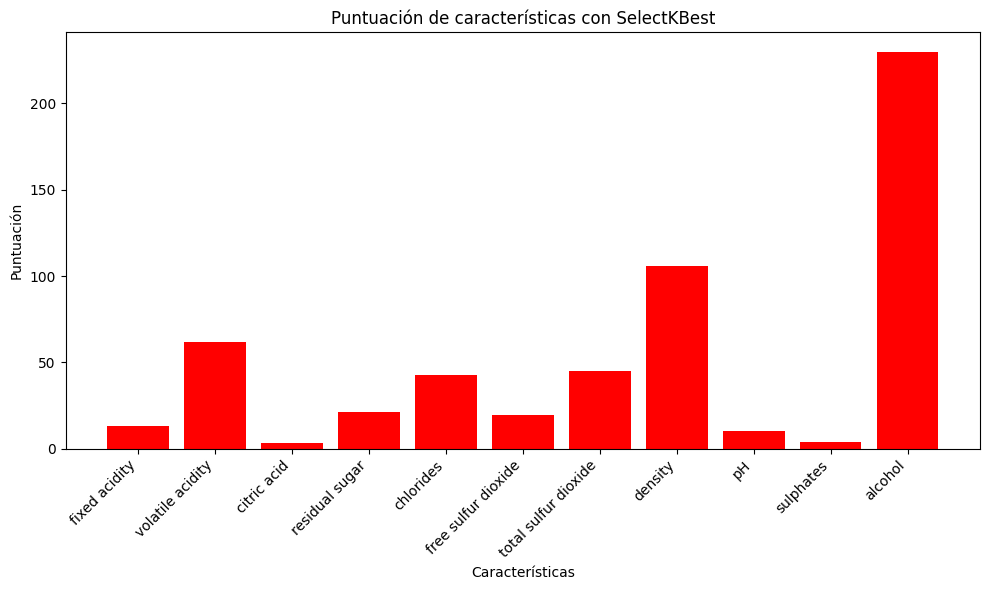

Características seleccionadas:
1. volatile acidity
2. chlorides
3. total sulfur dioxide
4. density
5. alcohol


In [6]:
X = data.drop('quality', axis=1)
y = data['quality']

# Especificar el número de características a seleccionar
k = 5  # Seleccionar las 5 mejores características

# Aplicar SelectKBest para la selección de características
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X, y)

# Obtener las características seleccionadas
selected_features = selector.get_support(indices=True)

# Graficar la selección de características
plt.figure(figsize=(10, 6))
plt.bar(range(len(selector.scores_)), selector.scores_, tick_label=X.columns, color='red')
plt.title('Puntuación de características con SelectKBest')
plt.xlabel('Características')
plt.ylabel('Puntuación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Imprimir las características seleccionadas
print("Características seleccionadas:")
for i, feature_idx in enumerate(selected_features):
    print(f"{i+1}. {X.columns[feature_idx]}")

#Selección de características

In [7]:
data = data[['quality', 'volatile acidity', 'density', 'total sulfur dioxide', 'chlorides', 'alcohol']]

X = data.drop('quality', axis=1)
y = data['quality']

data

,quality,volatile acidity,density,total sulfur dioxide,chlorides,alcohol
0,6,0.27,1.00100,170.0,0.045,8.8
1,6,0.30,0.99400,132.0,0.049,9.5
2,6,0.28,0.99510,97.0,0.050,10.1
3,6,0.23,0.99560,186.0,0.058,9.9
4,6,0.23,0.99560,186.0,0.058,9.9
...,...,...,...,...,...,...
4893,6,0.21,0.99114,92.0,0.039,11.2
4894,5,0.32,0.99490,168.0,0.047,9.6
4895,6,0.24,0.99254,111.0,0.041,9.4
4896,7,0.29,0.98869,110.0,0.022,12.8


#Mostramos los variables que tiene quality en el dataset

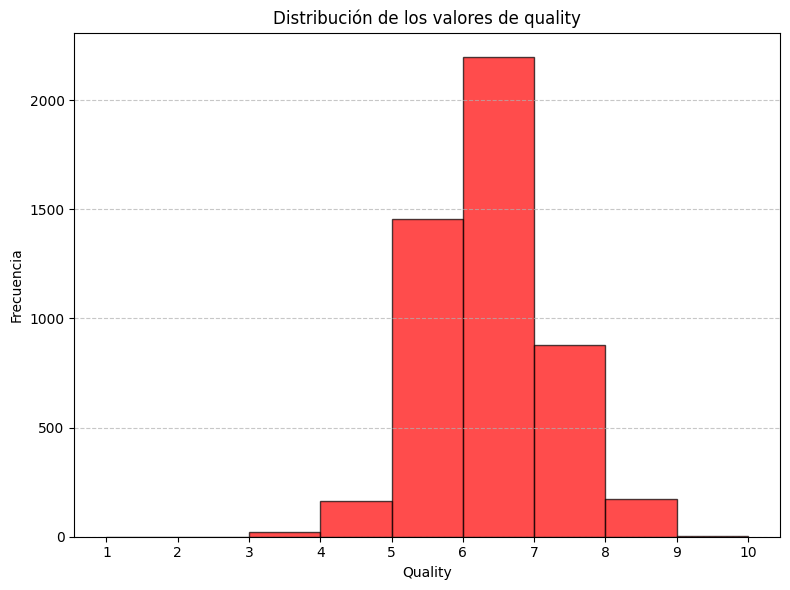

In [8]:
# Graficar los valores de quality
plt.figure(figsize=(8, 6))
plt.hist(y, bins=range(1, 11), color='red', edgecolor='black', alpha=0.7)
plt.title('Distribución de los valores de quality')
plt.xlabel('Quality')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Separamos las variables en Train y Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelos a entrenar

In [11]:
# Modelos a entrenar
modelos = [
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier()
]

names = [
    "DecisionTreeClassifier",
    "ExtraTreeClassifier",
    "RandomForestClassifier",
    "ExtraTreesClassifier",
    "GradientBoostingClassifier",
    "AdaBoostClassifier",
    "BaggingClassifier"
]

cv = StratifiedKFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal
total_scores = []
for name, clf in zip(names, modelos):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(X_train, y_train):
    # División train test aleatoria
    f_train_x = X_train.iloc[train_fold]           # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)
    # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(X_train.iloc[test_fold])
    # evaluación del modelo
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo:%s =%6.2f" % (names[i], total_scores[i]))


Modelo:DecisionTreeClassifier =  0.56
Modelo:ExtraTreeClassifier =  0.55
Modelo:RandomForestClassifier =  0.64
Modelo:ExtraTreesClassifier =  0.64
Modelo:GradientBoostingClassifier =  0.58
Modelo:AdaBoostClassifier =  0.27
Modelo:BaggingClassifier =  0.60


#Función para la matriz de confusión

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    print("Metrics \n"
      +classification_report(y_true, y_pred))

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#Seleccionamos el modelo, buscamos los mejores párametros y entrenamos

Nos quedamos con RandomForestClassifier que es el que mejor precisión nos ha dado.

Buscamos el mejor valor para criterion

In [13]:
classifiers = {
    "gini": RandomForestClassifier(criterion="gini", random_state=42),
    "entropy": RandomForestClassifier(criterion="entropy", random_state=42),
    "log_loss": RandomForestClassifier(criterion="log_loss", random_state=42)
}

best_accuracy = 0
best_criterion = "gini"

for criterion, clf in classifiers.items():
  acc_scores = []
  print({criterion})
  for fold_idx, (train_fold, test_fold) in enumerate(cv.split(X_train, y_train), 1):
      # División train test aleatoria
      f_train_x = X_train.iloc[train_fold] # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
      f_train_y = y_train.iloc[train_fold]
      # entrenamiento
      clf.fit(f_train_x, f_train_y)
      y_pred = clf.predict(X_train.iloc[test_fold])
      acc = accuracy_score(y_train.iloc[test_fold], y_pred)
      acc_scores.append(acc)

  avg_acc = sum(acc_scores) / len(acc_scores)
  print(f"Accuracy: {avg_acc}\n")

  if avg_acc > best_accuracy:
    best_accuracy = avg_acc
    best_criterion = criterion

print(f"Mejor criterion: {best_criterion}, Precisión: {best_accuracy}")

{'gini'}
Accuracy: 0.6431852242812834

{'entropy'}
Accuracy: 0.6340028540151692

{'log_loss'}
Accuracy: 0.6365437745979617

Mejor criterion: gini, Precisión: 0.6431852242812834


Buscamos el mejor valor para max_depth

In [14]:
best_accuracy = 0
best_max_depth = None

max_depths = []
accuracies = []

for max_depth in range(2, 30):
    print(f"Probando max_depth con {best_criterion}: {max_depth}")
    clf = RandomForestClassifier(max_depth=max_depth, criterion=best_criterion, random_state=42)
    acc_scores = []
    for train_fold, test_fold in cv.split(X_train, y_train):
        # División train test aleatoria
        f_train_x = X_train.iloc[train_fold] # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
        f_train_y = y_train.iloc[train_fold]
        # entrenamiento
        clf.fit(f_train_x, f_train_y)
        y_pred = clf.predict(X_train.iloc[test_fold])
        acc = accuracy_score(y_train.iloc[test_fold], y_pred)
        acc_scores.append(acc)

    avg_acc = sum(acc_scores) / len(acc_scores)
    print(f"Accuracy: {avg_acc}\n")

    max_depths.append(max_depth)
    accuracies.append(avg_acc)

    if avg_acc > best_accuracy:
      best_accuracy = avg_acc
      best_max_depth = max_depth

print(f"Mejor max_depth: {best_max_depth}, Precisión: {best_accuracy}")

Probando max_depth con gini: 2
Accuracy: 0.5306216931216932

Probando max_depth con gini: 3
Accuracy: 0.5405837047462663

Probando max_depth con gini: 4
Accuracy: 0.54262386947116

Probando max_depth con gini: 5
Accuracy: 0.5492571741340215

Probando max_depth con gini: 6
Accuracy: 0.5607458883936716

Probando max_depth con gini: 7
Accuracy: 0.5668683373732635

Probando max_depth con gini: 8
Accuracy: 0.5821868402533428

Probando max_depth con gini: 9
Accuracy: 0.5895890348476556

Probando max_depth con gini: 10
Accuracy: 0.6128176557979513

Probando max_depth con gini: 11
Accuracy: 0.6258337242943155

Probando max_depth con gini: 12
Accuracy: 0.6299117731383742

Probando max_depth con gini: 13
Accuracy: 0.6316919488101754

Probando max_depth con gini: 14
Accuracy: 0.6357761878697838

Probando max_depth con gini: 15
Accuracy: 0.6378319910339614

Probando max_depth con gini: 16
Accuracy: 0.6337418875596216

Probando max_depth con gini: 17
Accuracy: 0.6368086506633304

Probando max_depth

Mostramos como va cambiando la precisión según cambia el valor de max_depth

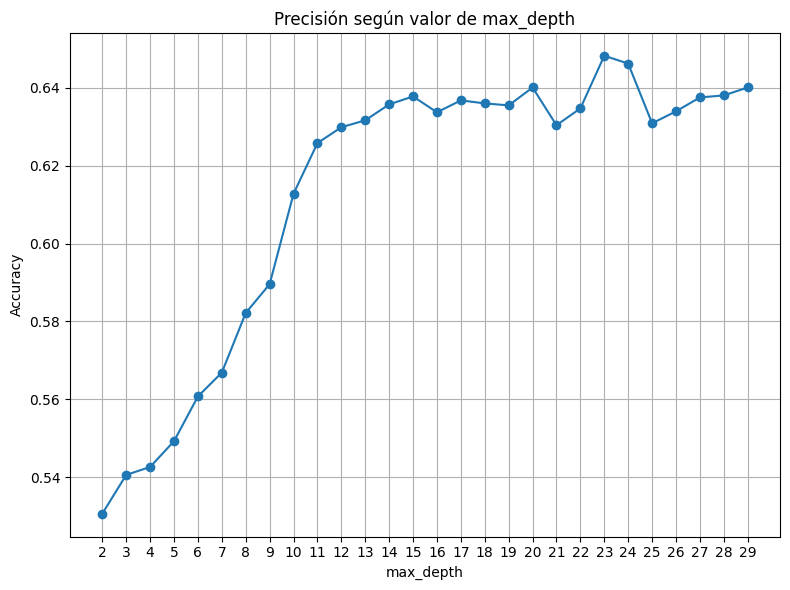

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(max_depths, accuracies, marker='o')
plt.title('Precisión según valor de max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(2, 30))
plt.tight_layout()
plt.show()

Entrenamos con los párametros que hemos seleccionado

In [16]:
model_selected = RandomForestClassifier(max_depth=best_max_depth, criterion=best_criterion, random_state=42)

for train_fold, test_fold in cv.split(X_train, y_train):
    # División train test aleatoria
    f_train_x = X_train.iloc[train_fold] # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento
    clf.fit(f_train_x, f_train_y)
    y_pred = clf.predict(X_train.iloc[test_fold])
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    acc_scores.append(acc)

avg_acc = sum(acc_scores) / len(acc_scores)
print(f"Accuracy: {avg_acc}\n")

Accuracy: 0.6375759115906898



In [17]:
model_selected = RandomForestClassifier(max_depth=best_max_depth, criterion=best_criterion, random_state=42)

model_selected.fit(X_train, y_train)

y_pred = model_selected.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Precisión:", acc)

Precisión: 0.6673469387755102


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.44      0.16      0.24        25
           5       0.69      0.64      0.67       291
           6       0.64      0.77      0.69       432
           7       0.72      0.61      0.66       192
           8       0.93      0.40      0.56        35

    accuracy                           0.67       980
   macro avg       0.57      0.43      0.47       980
weighted avg       0.67      0.67      0.66       980

Confusion matrix, without normalization
[[  0   0   2   3   0   0]
 [  0   4  10  11   0   0]
 [  0   5 187  93   6   0]
 [  0   0  69 331  31   1]
 [  0   0   3  71 118   0]
 [  0   0   0  12   9  14]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

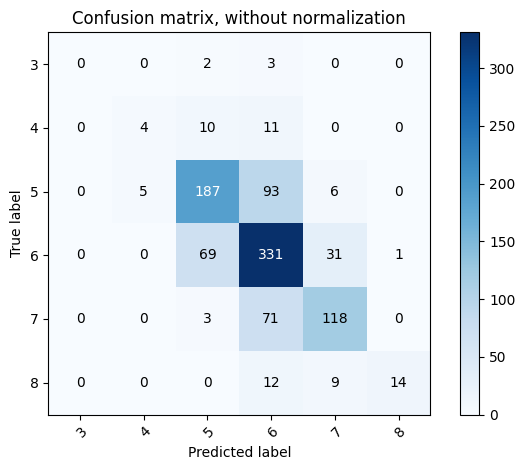

In [18]:
plot_confusion_matrix(y_test, y_pred, classes = np.array(['0',',1','2','3','4','5','6','7','8','9','10']), normalize=False)

Metrics 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.44      0.16      0.24        25
           5       0.69      0.64      0.67       291
           6       0.64      0.77      0.69       432
           7       0.72      0.61      0.66       192
           8       0.93      0.40      0.56        35

    accuracy                           0.67       980
   macro avg       0.57      0.43      0.47       980
weighted avg       0.67      0.67      0.66       980

Normalized confusion matrix
[[0.         0.         0.4        0.6        0.         0.        ]
 [0.         0.16       0.4        0.44       0.         0.        ]
 [0.         0.01718213 0.64261168 0.31958763 0.02061856 0.        ]
 [0.         0.         0.15972222 0.7662037  0.07175926 0.00231481]
 [0.         0.         0.015625   0.36979167 0.61458333 0.        ]
 [0.         0.         0.         0.34285714 0.25714286 0.4       ]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

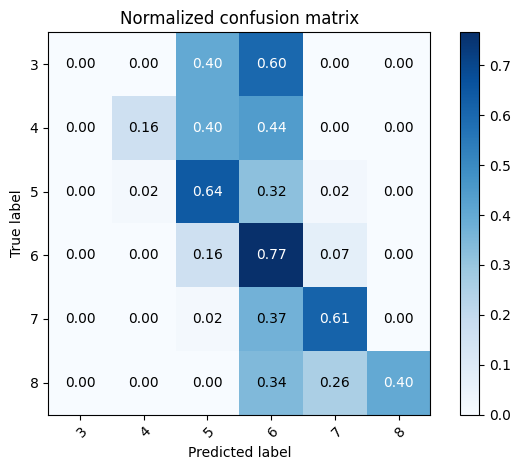

In [19]:
plot_confusion_matrix(y_test, y_pred, classes = np.array(['0',',1','2','3','4','5','6','7','8','9','10']), normalize=True)

#Exportamos, importamos el modelo y volvemos a predecir

In [20]:
name_model = 'ModelSelectedVinosBlancos.pkl'

joblib.dump(model_selected, name_model)

['ModelSelectedVinosBlancos.pkl']

In [21]:
model_imported = joblib.load(name_model)

In [22]:
y_pred_model_imported = model_imported.predict(X)

Metrics 
              precision    recall  f1-score   support

           3       1.00      0.75      0.86        20
           4       0.97      0.87      0.92       163
           5       0.94      0.93      0.94      1457
           6       0.92      0.95      0.94      2198
           7       0.95      0.92      0.93       880
           8       0.99      0.88      0.93       175
           9       1.00      1.00      1.00         5

    accuracy                           0.93      4898
   macro avg       0.97      0.90      0.93      4898
weighted avg       0.93      0.93      0.93      4898

Confusion matrix, without normalization
[[  15    0    2    3    0    0    0]
 [   0  142   10   11    0    0    0]
 [   0    5 1353   93    6    0    0]
 [   0    0   69 2097   31    1    0]
 [   0    0    3   71  806    0    0]
 [   0    0    0   12    9  154    0]
 [   0    0    0    0    0    0    5]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

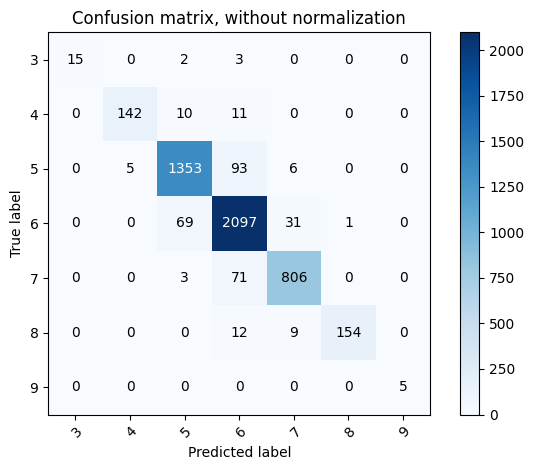

In [23]:
plot_confusion_matrix(y, y_pred_model_imported, classes = np.array(['0',',1','2','3','4','5','6','7','8','9','10']), normalize=False)

Metrics 
              precision    recall  f1-score   support

           3       1.00      0.75      0.86        20
           4       0.97      0.87      0.92       163
           5       0.94      0.93      0.94      1457
           6       0.92      0.95      0.94      2198
           7       0.95      0.92      0.93       880
           8       0.99      0.88      0.93       175
           9       1.00      1.00      1.00         5

    accuracy                           0.93      4898
   macro avg       0.97      0.90      0.93      4898
weighted avg       0.93      0.93      0.93      4898

Normalized confusion matrix
[[7.50000000e-01 0.00000000e+00 1.00000000e-01 1.50000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.71165644e-01 6.13496933e-02 6.74846626e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.43170899e-03 9.28620453e-01 6.38297872e-02
  4.11805079e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.13

<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

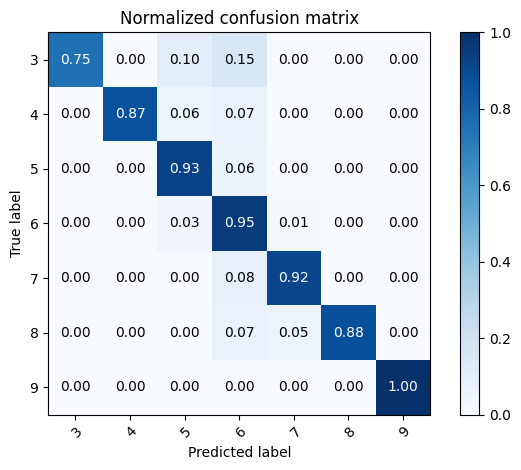

In [24]:
plot_confusion_matrix(y, y_pred_model_imported, classes = np.array(['0',',1','2','3','4','5','6','7','8','9','10']), normalize=True)